<a href="https://colab.research.google.com/github/Sanjeet2601/Image_classification/blob/main/assignment4_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 4
# Submission Deadline: April 16, 6PM
# Submission Link: https://forms.gle/G4B6FiAsyoPLCkZu9  

# Table of Contents

1. [Provide Information](#Provide-Information)
2. [Instructions](#Instructions)
3. [Environment](#Environment)
4. [Hyperparameters](#Hyperparameters)
5. [Helper Functions](#helper)
6. [DDPG](#ddpg)
7. [TD3](#td3)
8. [PPO](#ppo)
9. [Experiments to Run](#experiments)

# Provide Information
<a id="Provide-Information"></a>

Name: **Sanjeet Singh**

Roll No.: **231110606**

IITK EMail: **sanjeetsi23@iitk.ac.in**

# Instructions
<a id="Instructions"></a>


**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), and an image folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via the Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
-  **DO NOT Forget to write name, roll no and email details above**
- **In addition to checking your code, we will be conducting one-on-one viva for the evaluation. So please make sure that you do not cheat!**
- **Use of LLMs based tools or AI-based code tools is strictly prohibited! Use of ChatGPT, VS Code, Gemini, CO-Pilot, etc. is not allowed. NOTE VS code is also not allowed. Even in Colab disable the AI assistant. If you use it, we will know it very easily. Use of any of the tools would be counted as cheating and would be given a ZERO, with no questions asked.**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

# OpenAI Gym Environments
<a id="Environment"></a>

In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
# all imports go in here
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time
import random
from itertools import count, cycle
from collections import deque, namedtuple

In this assignment we will be exploring Deep RL algorithms and for this we will be using environmentd provided by OpenAI Gym. In particular we will be exploring "Pendulum-v1" , "Hopper-v4", and "Half-Cheetah" environments (https://gymnasium.farama.org/environments/classic_control/ ). The code to instantiate the environments are given in the cells below. Run these cells and play with the environments to learn more details about the environments.

In [ ]:
# Create Inverted Pendulum environment
#https://gymnasium.farama.org/environments/classic_control/cart_pole/

env = gym.make('Pendulum-v1', render_mode="rgb_array")
s = env.reset(seed = 34)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(20):
    print("In episode {}".format(episode))
    for i in range(100):
        env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, truncated, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()

Observation Space = 
Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action Space = 
Box(-2.0, 2.0, (1,), float32)
In episode 0
(array([-0.9996797 , -0.0253075 ,  0.74435383], dtype=float32), {})
[-0.99725795 -0.07400423  0.975235  ]
[-0.9937531  -0.11160145  0.7552495 ]
[-0.99102837 -0.13365154  0.44436502]
[-0.98886454 -0.14881845  0.30641258]
[-0.98786795 -0.15529612  0.13107787]
[-0.9878292  -0.15554255  0.00498949]
[-0.9906063  -0.13674459 -0.38004568]
[-0.9934102  -0.11461315 -0.4461763 ]
[-0.99651235 -0.08344535 -0.62646157]
[-0.99941695 -0.03414315 -0.98785424]
[-0.9999426   0.01071434 -0.8972866 ]
[-0.99919087  0.0402193  -0.5903121 ]
[-0.99654907  0.08300565 -0.85742223]
[-0.99396074  0.10973615 -0.5371267 ]
[-0.99281746  0.11963905 -0.19937436]
[-0.9922851   0.12397716 -0.08741318]
[-0.9933113   0.11546727  0.17143139]
[-0.9949998   0.09987643  0.31364357]
[-0.99545765  0.09520511  0.09387412]
[-0.9969699   0.07778885  0.34964004]
[-0.99790144  0.06475157  0.26141223]
[-0.9989

In [ ]:
# !pip install gymnasium
# !pip install swig
# !pip install gymnasium[box2d]
# !pip install gymnasium[mujoco]

# # Create Hopper environment
# # https://gymnasium.farama.org/environments/mujoco/hopper/


# import gymnasium as gym
# env = gym.make("Hopper-v4", render_mode = "rgb_array")
# s = env.reset(seed = 34)
# print("Observation Space = ")
# print(env.observation_space)
# print("Action Space = ")
# print(env.action_space)
# done = False
# for episode in range(1):
#     print("In episode {}".format(episode))
#     for i in range(100):
#         env.render()
#         print(s)
#         a = env.action_space.sample()
#         s, r, done, truncated, _ = env.step(a)
#         if done:
#             print("Finished after {} timestep".format(i+1))
# env.close()


In [ ]:

# !pip install gymnasium
# !pip install swig
# !pip install gymnasium[box2d]
# !pip install gymnasium[mujoco]

# # Create Half-Cheetah environment
# # https://gymnasium.farama.org/environments/mujoco/hopper/


# import gymnasium as gym
# env = gym.make("HalfCheetah-v4", render_mode = "rgb_array")
# s = env.reset(seed = 34)
# print("Observation Space = ")
# print(env.observation_space)
# print("Action Space = ")
# print(env.action_space)
# done = False
# for episode in range(1):
#     print("In episode {}".format(episode))
#     for i in range(100):
#         env.render()
#         print(s)
#         a = env.action_space.sample()
#         s, r, done, truncated, _ = env.step(a)
#         if done:
#             print("Finished after {} timestep".format(i+1))
# env.close()


# Hyperparameters
<a id="Hyperparameters"></a>

All your hyperparameters should be stated here. We will change their value here and your code should work  accordingly.

In [ ]:
# mention the values of all the hyperparameters (you can add more hyper-paramters as well) to be used in the entire notebook, put the values that gave the best
# performance and were finally used for the agent

gamma = 0.95
noiseScaleRatio = 0.15
minSamples = 500
epocs = 10
tau = 0.0015
maxt = 200


MAX_TRAIN_EPISODES = 120
MAX_EVAL_EPISODES = 1



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper Functions
<a id="helper"></a>

Write all the helper functions that will be used for value-based and policy based algorithms below. In case you want to add more helper functions, please feel free to add.

In [ ]:
def reset_env(env, seed=None, options=None):
    initial_observation, info = env.reset(seed=seed, options=options)
    return initial_observation, info

In [ ]:

def createValueNetwork(inDim, outDim, action_size, hDim = [32,32], activation = F.relu):
    class ValueNetwork(nn.Module):
        def __init__(self, inDim, outDim, action_size, hDim, activation):
            super(ValueNetwork, self).__init__()
            self.activation = activation
            self.device = device
            self.input_layer = nn.Linear(inDim, hDim[0])
            self.hidden_layers = nn.ModuleList()
            for i in range(len(hDim) - 1):
                if i == 0:
                    self.hidden_layers.append(nn.Linear(hDim[i] + action_size, hDim[i + 1]))
                else:
                    self.hidden_layers.append(nn.Linear(hDim[i], hDim[i + 1]))
            self.output_layer = nn.Linear(hDim[-1], outDim)
            self.to(device)

        def _format(self, state):
            if not isinstance(state, torch.Tensor):
                state = torch.tensor(state, device=device, dtype=torch.float32)
            if state.dim() == 1:
                state = state.unsqueeze(0)
            return state

        def forward(self, state, action):
            x = self.activation(self.input_layer(state))
            x = torch.cat((x, action), dim=1)
            for hidden_layer in self.hidden_layers:
                x = self.activation(hidden_layer(x))
            x = self.output_layer(x)
            return x



    return ValueNetwork(inDim, outDim, action_size, hDim, activation)

In [ ]:

def createPolicyNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):
    class PolicyNetwork(nn.Module):
        def __init__(self, inDim, outDim, hDim, activation):
            super(PolicyNetwork, self).__init__()
            self.activation = activation
            self.device = device
            self.input_layer = nn.Linear(inDim, hDim[0])
            self.hidden_layers = nn.ModuleList()
            for i in range(len(hDim) - 1):
                self.hidden_layers.append(nn.Linear(hDim[i], hDim[i + 1]))
            self.output_layer = nn.Linear(hDim[-1], outDim)
            self.to(device)

        def _format(self, state):
            if not isinstance(state, torch.Tensor):
                state = torch.tensor(state, device=device, dtype=torch.float32)
            if state.dim() == 1:
                state = state.unsqueeze(0)
            return state

        def forward(self, state):
            x = self.activation(self.input_layer(state))
            for hidden_layer in self.hidden_layers:
                x = self.activation(hidden_layer(x))
            x = self.activation((self.output_layer(x)))
            return x

    return PolicyNetwork(inDim, outDim, hDim, activation)

## ReplayBuffer

In next few cells, you will implement replaybuffer class.

This class creates a buffer for storing and retrieving experiences. This is a generic class and can be used
for different agents like NFQ, DQN, DDQN, PER_DDQN, etc.
Following are the methods for this class which are implemented in subsequent cells

```
class ReplayBuffer():
    def __init__(self, bufferSize, batch_size, seed)
    def store(self, state, action, reward, next_state, done)
    def sample(self, batchSize)
    def length(self)
```   

In [ ]:
class ReplayBuffer():
    def __init__(self, buffer_size, batch_size, seed):
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def store(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def sample(self, batchSize):
        batch_size = batchSize if batchSize is not None else self.batch_size
        experiences = random.sample(self.memory, k=batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def splitExperiences(self, experiences):
        states, actions, rewards, nextStates, dones = experiences
        return states, actions, rewards, nextStates, dones

In [ ]:
class ReplayBuffer(ReplayBuffer):
    def length(self):
        return len(self.memory)

## Deep Deterministic Policy Gradient (DDPG) ##
<a id="ddpg"></a>

Implement the Deep Deterministic Policy Gradient (DDPG) agent. We have studied about DDPG agent in the Lecture. Use the function definitions (given below).

This class implements the DDPG agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(self, env, seed, gamma, tau, bufferSize, batch_size, updateFrequency,
             policyOptimizerFn, valueOptimizerFn,
             policyOptimizerLR,valueOptimizerLR,
             MAX_TRAIN_EPISODES,MAX_EVAL_EPISODE,
             optimizerFn)
    
    def runDDPG(self)
    def trainAgent(self)
    def gaussianStrategy(self, net , s , envActionRange , noiseScaleRatio,
        explorationMax = True)
    def greedyStrategy(self, net , s , envActionRange)
    def trainNetworks(self, experiences)
    def updateNetworks(self, onlineNet, targetNet, tau)
    def evaluateAgent(self)




```

In [ ]:
class DDPG():
    def __init__(self, env, seed, gamma, tau, bufferSize, batch_size, updateFrequency,
             policyOptimizerFn, valueOptimizerFn,
             policyOptimizerLR,valueOptimizerLR,
             MAX_TRAIN_EPISODES,MAX_EVAL_EPISODE,
             optimizerFn):
        self.env = gym.make(env)
        self.tau = tau
        self.seed = seed
        self.gamma = gamma
        self.bufferSize = bufferSize
        self.batch_size = batch_size
        self.updateFrequency = updateFrequency
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.replay_buffer = ReplayBuffer(self.bufferSize, self.batch_size, self.seed)


        reset_env(self.env, seed=seed)
        torch.manual_seed(seed)
        np.random.seed(seed)
        random.seed(seed)



        inDim = self.env.observation_space.shape[0]
        outDim = self.env.action_space.shape[0]
        hDim = [128,128]



        activation = torch.nn.functional.relu
        self.target_value = createValueNetwork(inDim, 1, outDim, hDim, activation)
        self.online_value = createValueNetwork(inDim, 1, outDim, hDim, activation)
        self.online_value.load_state_dict(self.target_value.state_dict())

        self.online_policy = createPolicyNetwork(inDim, outDim, hDim, activation)
        self.target_policy = createPolicyNetwork(inDim, outDim, hDim, activation)
        self.online_policy.load_state_dict(self.target_policy.state_dict())


        self.actor_optimizer = policyOptimizerFn(self.online_policy, policyOptimizerLR)
        self.critic_optimizer = valueOptimizerFn(self.online_value, valueOptimizerLR)







In [ ]:
class DDPG(DDPG):
    def updateNetworks(self, onlineNet, targetNet, tau):
        for target, online in zip(targetNet.parameters(),
                                  onlineNet.parameters()):
            target_ratio = (1.0 - tau) * target.data
            online_ratio = tau * online.data
            mixed_weights = target_ratio + online_ratio
            target.data.copy_(mixed_weights)



In [ ]:
class DDPG(DDPG):
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True ):
        s = torch.from_numpy(s).float().to(device)
        actionLowVal , actionHighVal = envActionRange
        if explorationMax:
            scale = actionHighVal
        else:
            scale = noiseScaleRatio * actionHighVal

        net.eval()
        with torch.no_grad():
            greedy_action = net(s).cpu().data.numpy()
        net.train()
        noise = np.random.normal (0, scale , size=len(actionHighVal))
        action = greedy_action + noise
        action = np.clip( action , actionLowVal , actionHighVal )
        return action

In [ ]:
class DDPG(DDPG):
    def greedyStrategy (self, net , s , envActionRange ):
        #this function selects the greedy action
        #and clips it within the range

        #Your code here
        s = torch.from_numpy(s).float().to(device)
        actionLowVal , actionHighVal = envActionRange
        net.eval()
        with torch.no_grad():
            greedy_action = net(s).cpu().data.numpy()
        net.train()
        #greedy_action = net(s).detach()
        action = np.clip( greedy_action , actionLowVal , actionHighVal )
        return action



In [ ]:
class DDPG(DDPG):
    def runDDPG (self):
        resultList, trainTimeList, evalRewardsList, wallClockTimeList = self.trainAgent()
        resultsEval = self.evaluateAgent()
        finalEvalReward  = np.mean(resultsEval)


        return resultList, trainTimeList, evalRewardsList, wallClockTimeList, finalEvalReward


In [ ]:
class DDPG(DDPG):
    def trainAgent(self):
        training_start = time.time()
        self.episode_timestep = []
        self.episode_reward = []
        self.episode_seconds = []
        self.evaluation_scores = []
        global train_count
        train_count +=1

        torch.manual_seed(self.seed)
        np.random.seed(self.seed)
        random.seed(self.seed)


        self.updateNetworks(self.online_value, self.target_value, self.tau)
        self.updateNetworks(self.online_policy, self.target_policy, self.tau)

        envActionRange = (self.env.action_space.low , self.env.action_space.high)

        result = np.empty((MAX_TRAIN_EPISODES, 5))
        result[:] = np.nan
        training_time = 0

        for e in range(1, MAX_TRAIN_EPISODES+1):
            print(f'Episode {e} and train called {train_count} times')
            episode_start = time.time()
            state, _ = self.env.reset(seed=self.seed)
            self.episode_reward.append(0.0)
            self.episode_timestep.append(0.0)



            for t in range(maxt):
                action = self.gaussianStrategy(self.online_policy , state ,envActionRange , noiseScaleRatio ,
                                               self.replay_buffer.length() < minSamples)
                new_state, reward, is_terminal, is_truncated, info = env.step(action)
                is_failure = is_terminal and not is_truncated
                self.episode_reward[-1] += reward
                self.episode_timestep[-1] += 1
                self.replay_buffer.store(state, action, reward, new_state, float(is_failure))

                if self.replay_buffer.length() > minSamples:
                    experiences = self.replay_buffer.sample(self.batch_size)
                    self.trainNetwork(experiences)

                if e % self.updateFrequency == 0:
                    self.updateNetworks(self.online_value, self.target_value, self.tau)
                    self.updateNetworks(self.online_policy, self.target_policy, self.tau)


                state = new_state
                if is_terminal:
                    break

            episode_elapsed = time.time() - episode_start
            self.episode_seconds.append(episode_elapsed)
            training_time += episode_elapsed
            evaluation_score= np.mean(self.evaluateAgent())

            total_step = int(np.sum(self.episode_timestep))
            self.evaluation_scores.append(evaluation_score)

            mean_10_reward = np.mean(self.episode_reward[-10:])
            std_10_reward = np.std(self.episode_reward[-10:])
            mean_100_reward = np.mean(self.episode_reward[-100:])
            std_100_reward = np.std(self.episode_reward[-100:])
            mean_100_eval_score = np.mean(self.evaluation_scores[-100:])
            std_100_eval_score = np.std(self.evaluation_scores[-100:])


            wallclock_elapsed = time.time() - training_start
            result[e-1] = total_step, mean_100_reward, mean_100_eval_score, training_time, wallclock_elapsed


        final_eval_rwd_list = self.evaluateAgent()
        mean_eval_rwd = np.mean(final_eval_rwd_list)
        wallclock_time = time.time() - training_start
        self.env.close()

        return result, training_time, final_eval_rwd_list, wallclock_time

In [ ]:
class DDPG(DDPG):
    def trainNetwork(self, experiences):

        states, actions, rewards, next_states, dones = experiences

        actions_next = self.target_policy(next_states)
        Q_targets_next = self.target_value(next_states, actions_next)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.online_value(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        # Compute actor loss
        actions_pred = self.online_policy(states)
        actor_loss = -self.online_value(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()


In [ ]:
class DDPG(DDPG):
    def evaluateAgent(self):
        rwd_list = []
        envActionRange = (self.env.action_space.low , self.env.action_space.high)
        for _ in range(self.MAX_EVAL_EPISODES):
            s, _ = self.env.reset(seed=self.seed)
            rwd_list.append(0)
            for _ in count():
                a = self.greedyStrategy( self.online_policy , s , envActionRange)
                s, rwd, done, truncated,_ = self.env.step(a)
                rwd_list[-1] += rwd
                if done or truncated: break
        return rwd_list

#Pendulum-v1

In [ ]:
train_count = 0
ddpg_results = []
best_agent, best_eval_score = None, float('-inf')
seed_list = [321, 3, 744, 377, 293]
val_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

for myseed in seed_list:

    ddpg = DDPG(
    env = "Pendulum-v1",
    seed = myseed,
    gamma = gamma,
    tau = tau,
    bufferSize = 5000,
    batch_size  = 64,
    updateFrequency = 1,
    policyOptimizerFn = val_optimizer_fn,
    valueOptimizerFn = val_optimizer_fn,
    policyOptimizerLR = 0.001,
    valueOptimizerLR = 0.001,
    MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES,
    MAX_EVAL_EPISODE = MAX_EVAL_EPISODES,
    optimizerFn = val_optimizer_fn
    )
    trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = ddpg.runDDPG()
    ddpg_results.append(trainRewardsList)
    if final_eval_score > best_eval_score:
        best_eval_score = final_eval_score
        best_agent = ddpg

ddpg_results = np.array(ddpg_results)


Episode 1 and train called 1 times
Episode 2 and train called 1 times
Episode 3 and train called 1 times
Episode 4 and train called 1 times
Episode 5 and train called 1 times
Episode 6 and train called 1 times
Episode 7 and train called 1 times
Episode 8 and train called 1 times
Episode 9 and train called 1 times
Episode 10 and train called 1 times
Episode 11 and train called 1 times
Episode 12 and train called 1 times
Episode 13 and train called 1 times
Episode 14 and train called 1 times
Episode 15 and train called 1 times
Episode 16 and train called 1 times
Episode 17 and train called 1 times
Episode 18 and train called 1 times
Episode 19 and train called 1 times
Episode 20 and train called 1 times
Episode 21 and train called 1 times
Episode 22 and train called 1 times
Episode 23 and train called 1 times
Episode 24 and train called 1 times
Episode 25 and train called 1 times
Episode 26 and train called 1 times
Episode 27 and train called 1 times
Episode 28 and train called 1 times
E

In [ ]:
print(ddpg_results)

[[[ 2.00000000e+02 -1.63269065e+03 -1.06075876e+03  1.04533243e+00
    1.39936757e+00]
  [ 4.00000000e+02 -1.58823982e+03 -1.06075876e+03  1.64183998e+00
    2.17746019e+00]
  [ 6.00000000e+02 -1.57448053e+03 -1.06075876e+03  4.37209511e+00
    4.99553919e+00]
  ...
  [ 2.36000000e+04 -1.48285248e+03 -1.06075876e+03  1.69051293e+02
    1.80793822e+02]
  [ 2.38000000e+04 -1.47725259e+03 -1.06075876e+03  1.70376933e+02
    1.82207694e+02]
  [ 2.40000000e+04 -1.47200314e+03 -1.06075876e+03  1.71714979e+02
    1.83632921e+02]]

 [[ 2.00000000e+02 -9.55085999e+02 -1.63864482e+03  2.45009899e-01
    3.28505993e-01]
  [ 4.00000000e+02 -9.90737452e+02 -1.63864482e+03  4.94403362e-01
    6.65518284e-01]
  [ 6.00000000e+02 -1.09230652e+03 -1.62377416e+03  1.25725746e+00
    1.51469946e+00]
  ...
  [ 2.36000000e+04 -1.27842214e+03 -1.59403282e+03  1.69323889e+02
    1.80884824e+02]
  [ 2.38000000e+04 -1.27864784e+03 -1.59403282e+03  1.70628642e+02
    1.82273412e+02]
  [ 2.40000000e+04 -1.2794213

<ipython-input-23-59f08f2caff7>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


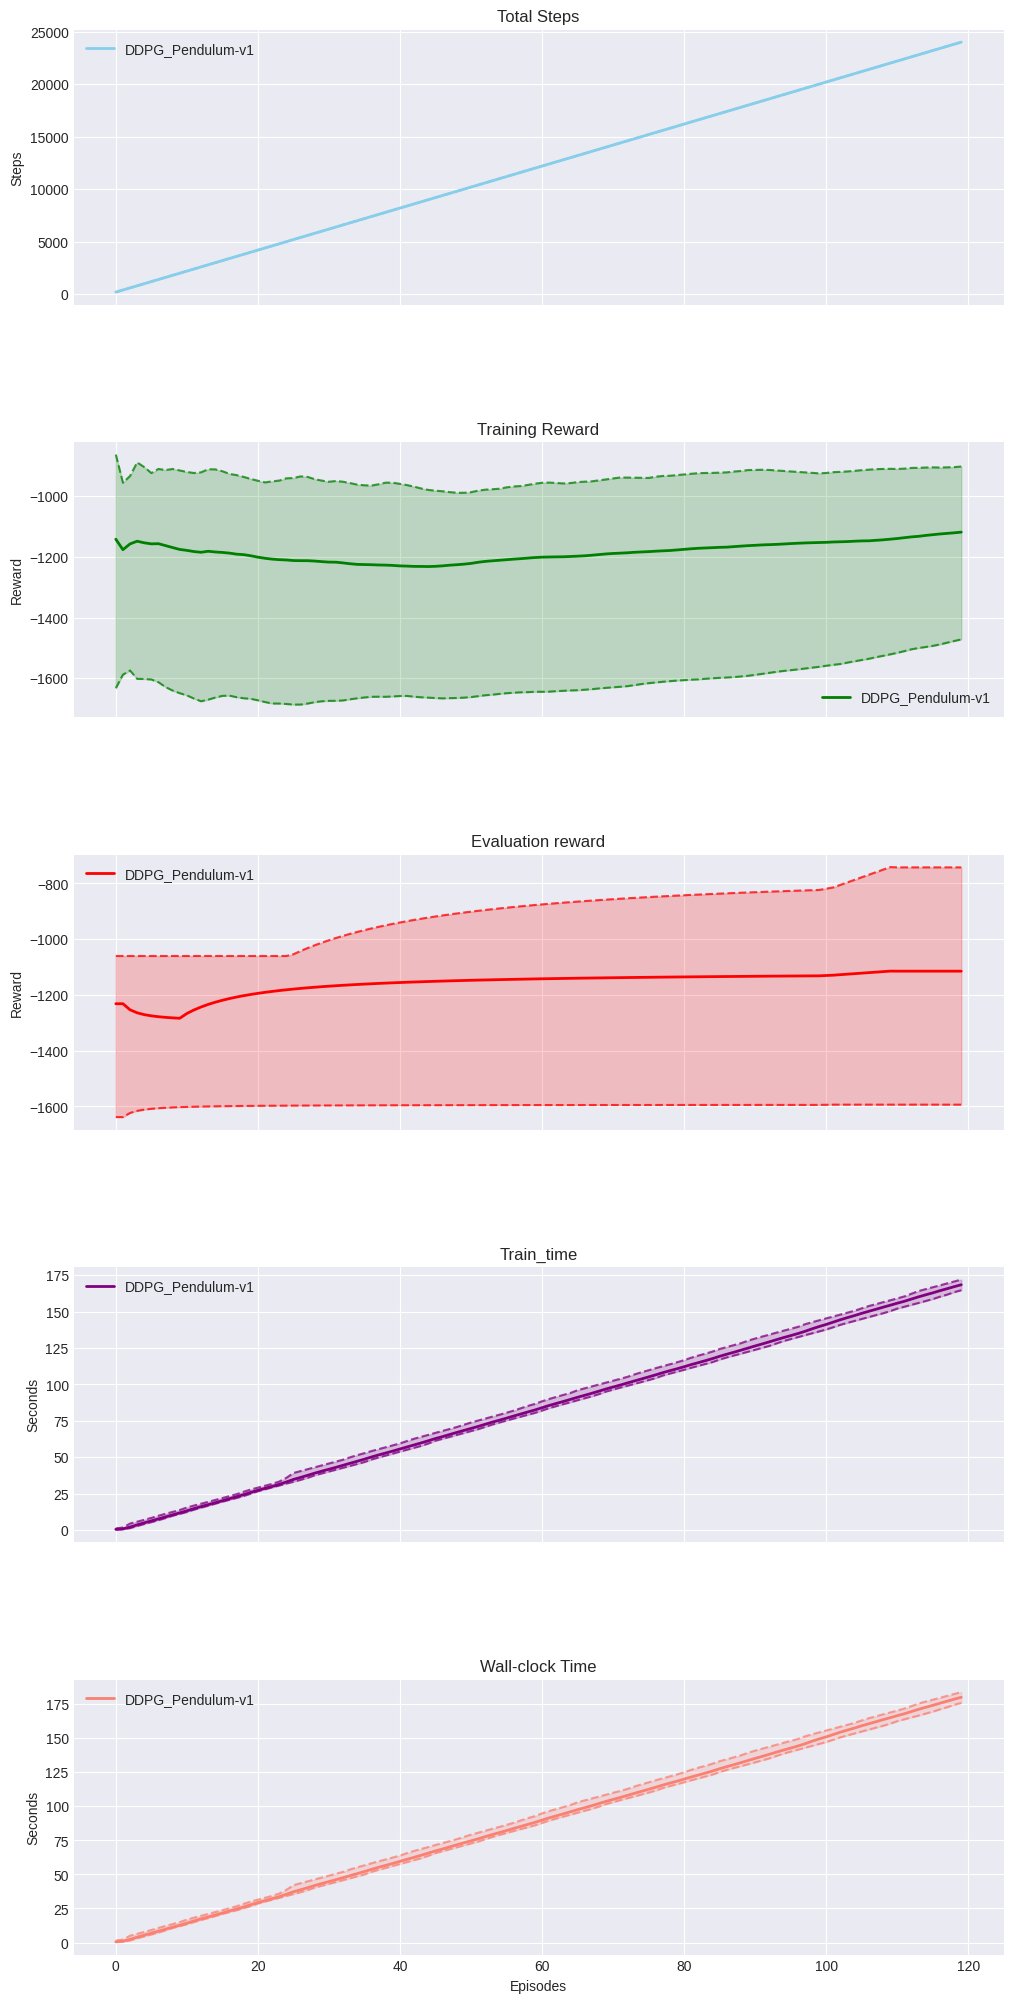

In [ ]:
reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ddpg_results, axis=0).T
reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ddpg_results, axis=0).T
reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ddpg_results, axis=0).T
episode_indices = np.arange(len(reward_avg))

plt.style.use('seaborn-darkgrid')
fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
fig.subplots_adjust(hspace=0.5)

linestyles = ['-', '--', '-.']
colors = ['skyblue', 'green', 'red', 'purple', 'salmon']
titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Train_time', 'Wall-clock Time']
y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# Generate plots
for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
    ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
    ax.plot(avg_data, label='DDPG_Pendulum-v1', color=color, linewidth=2)
    ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.legend()

plot_areas[-1].set_xlabel('Episodes')
plt.show()

In [ ]:
# !pip install gymnasium
!pip install swig
!pip install gymnasium[box2d]
!pip install gymnasium[mujoco]




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376133 sha256=5a5866bd72df6b8cbc6b1d4d95610dede4d2dd2e6d773ecaa00746d2804d1719
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 21.6 MB/s eta 0:00:00


In [ ]:
# train_count = 0
# ddpg_results = []
# best_agent, best_eval_score = None, float('-inf')
# seed_list = [420, 133, 74, 317, 233]
# val_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

# for myseed in seed_list:

#     ddpg = DDPG(
#     env = "Hopper-v4",
#     seed = myseed,
#     gamma = gamma,
#     tau = tau,
#     bufferSize = 5000,
#     batch_size  = 64,
#     updateFrequency = 1,
#     policyOptimizerFn = val_optimizer_fn,
#     valueOptimizerFn = val_optimizer_fn,
#     policyOptimizerLR = 0.001,
#     valueOptimizerLR = 0.001,
#     MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES,
#     MAX_EVAL_EPISODE = MAX_EVAL_EPISODES,
#     optimizerFn = val_optimizer_fn
#     )
#     trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = ddpg.runDDPG()
#     ddpg_results.append(trainRewardsList)
#     if final_eval_score > best_eval_score:
#         best_eval_score = final_eval_score
#         best_agent = ddpg

# ddpg_results = np.array(ddpg_results)

In [ ]:
# reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ddpg_results, axis=0).T
# reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ddpg_results, axis=0).T
# reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ddpg_results, axis=0).T
# episode_indices = np.arange(len(reward_avg))

# plt.style.use('seaborn-darkgrid')
# fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
# fig.subplots_adjust(hspace=0.5)

# linestyles = ['-', '--', '-.']
# colors = ['skyblue', 'green', 'red', 'purple', 'salmon']
# titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Train_time', 'Wall-clock Time']
# y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
# data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
# data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
# data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# # Generate plots
# for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
#     ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
#     ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
#     ax.plot(avg_data, label='DDPG_Hopper-v4', color=color, linewidth=2)
#     ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
#     ax.set_title(title)
#     ax.set_ylabel(y_label)
#     ax.legend()

# plot_areas[-1].set_xlabel('Episodes')
# plt.show()

HalfCheetah-v4

In [ ]:

# train_count = 0
# ddpg_results = []
# best_agent, best_eval_score = None, float('-inf')
# seed_list = [42, 3, 744, 377, 293]
# val_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

# for myseed in seed_list:

#     ddpg = DDPG(
#     env = "HalfCheetah-v4",
#     seed = myseed,
#     gamma = gamma,
#     tau = tau,
#     bufferSize = 5000,
#     batch_size  = 64,
#     updateFrequency = 1,
#     policyOptimizerFn = val_optimizer_fn,
#     valueOptimizerFn = val_optimizer_fn,
#     policyOptimizerLR = 0.001,
#     valueOptimizerLR = 0.001,
#     MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES,
#     MAX_EVAL_EPISODE = MAX_EVAL_EPISODES,
#     optimizerFn = val_optimizer_fn
#     )
#     trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, final_eval_score = ddpg.runDDPG()
#     ddpg_results.append(trainRewardsList)
#     if final_eval_score > best_eval_score:
#         best_eval_score = final_eval_score
#         best_agent = ddpg

# ddpg_results = np.array(ddpg_results)

In [ ]:
# reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max = np.max(ddpg_results, axis=0).T
# reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min = np.min(ddpg_results, axis=0).T
# reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg = np.mean(ddpg_results, axis=0).T
# episode_indices = np.arange(len(reward_avg))

# plt.style.use('seaborn-darkgrid')
# fig, plot_areas = plt.subplots(5, 1, figsize=(12, 25), sharex='col')
# fig.subplots_adjust(hspace=0.5)

# linestyles = ['-', '--', '-.']
# colors = ['skyblue', 'green', 'red', 'purple', 'salmon']
# titles = ['Total Steps','Training Reward', 'Evaluation reward',  'Train_time', 'Wall-clock Time']
# y_labels = ['Steps', 'Reward', 'Reward', 'Seconds', 'Seconds']
# data_max = [reward_max, steps_max, eval_score_max, train_time_max, wall_clock_max]
# data_min = [reward_min, steps_min, eval_score_min, train_time_min, wall_clock_min]
# data_avg = [reward_avg, steps_avg, eval_score_avg, train_time_avg, wall_clock_avg]

# # Generate plots
# for ax, title, color, max_data, min_data, avg_data, y_label in zip(plot_areas, titles, colors, data_max, data_min, data_avg, y_labels):
#     ax.plot(max_data, linestyle='--', color=color, alpha=0.75)
#     ax.plot(min_data, linestyle='--', color=color, alpha=0.75)
#     ax.plot(avg_data, label='DDPG_HalfCheetah-v4', color=color, linewidth=2)
#     ax.fill_between(episode_indices, min_data, max_data, color=color, alpha=0.2)
#     ax.set_title(title)
#     ax.set_ylabel(y_label)
#     ax.legend()

# plot_areas[-1].set_xlabel('Episodes')
# plt.show()

# Twin-Delayed Deep Deterministic Policy Gradient (TD3)
<a id="td3"></a>

Implement the Twin-delayed deep deterministic policy gradient (TD3) agent. We have studied about TD3 agent in the Lecture. Use the function definitions (given below).

This class implements the TD3 agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(env, gamma, tau,
    bufferSize ,
    updateFrequencyPolicy ,
    updateFrequencyValue ,
    trainPolicyFrequency ,
    policyOptimizerFn ,
    valueOptimizerFn ,
    policyOptimizerLR ,
    valueOptimizerLR ,
    MAX TRAIN EPISODES,
    MAX EVAL EPISODE,
    optimizerFn )
    
    def runTD3 (self)
    def trainAgent (self)
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True)
    def greedyStrategy (self, net , s , envActionRange)
    def trainNetworks (self,experiences , envActionRange)
    def updateValueNetwork(self, onlineNet, targetNet, tau)
    def updatePolicyNetwork(self, onlineNet, targetNet, tau)
    def evaluateAgent (self)



```

In [ ]:

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time
import random
from itertools import count, cycle
from collections import deque, namedtuple
import os
import sys
from tqdm import tqdm, trange
from collections import deque
import socket

HOSTNAME = socket.gethostname()
CWD = os.getcwd()
IMAGES_DIR = os.path.join(CWD, 'images')
os.makedirs(IMAGES_DIR, exist_ok=True)

N_EPISODES = 1
SEED = 42
GAMMA = 0.95
NOISE_SCALE_RATIO = 0.1
MIN_SAMPLES = 250
EPOCHS = 10
TAU = 0.0015

MAX_TRAIN_EPISODES = 120
MAX_EVAL_EPISODES = 1
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class ValueNetworkDDPG(nn.Module):
    def __init__(self, inDim, outDim, hDim = [32,32], action_dim = None, activation = F.relu, device=DEVICE):
        super(ValueNetworkDDPG, self).__init__()
        self.activation = activation
        self.inputLayer = nn.Linear(inDim, hDim[0])
        self.hiddenLayer = []
        for i in range(len(hDim)-1):
            self.hiddenLayer.append(nn.Linear(hDim[i] + action_dim, hDim[i+1] + action_dim, device=device))
        self.outputLayer = nn.Linear(hDim[-1] + action_dim, outDim)

    def forward(self, x, actions):
        x = self.activation(self.inputLayer(x))
        x = torch.cat([x, actions], 1)
        for layer in self.hiddenLayer:
            x = self.activation(layer(x))
        x = self.outputLayer(x)
        return x

class ValueNetworkTD3(nn.Module):
    def __init__(self, inDim, outDim, hDim = [32,32], action_dim = None, activation = F.relu, device=DEVICE):
        super(ValueNetworkTD3, self).__init__()
        self.activation = activation
        self.inputLayer = nn.Linear(inDim + action_dim, hDim[0])
        self.hiddenLayer = []
        for i in range(len(hDim)-1):
            self.hiddenLayer.append(nn.Linear(hDim[i], hDim[i+1], device=device))
        self.outputLayer = nn.Linear(hDim[-1], outDim)

    def forward(self, x, actions, actionRange):
        actionLow, actionHigh = actionRange
        actions = (actions - actions.min()) * (actionHigh - actionLow)/(actions.max() - actions.min()) + actionLow

        x = torch.cat([x, actions], 1)

        x1 = self.activation(self.inputLayer(x))
        for layer in self.hiddenLayer:
            x1 = self.activation(layer(x1))
        x1 = self.outputLayer(x1)

        x2 = self.activation(self.inputLayer(x))
        for layer in self.hiddenLayer:
            x2 = self.activation(layer(x2))
        x2 = self.outputLayer(x2)

        return x1, x2

def createValueNetwork(inDim, outDim, hDim = [8, 8], action_dim = None, activation = F.relu, agent = None):
    assert agent in ['DDPG', 'TD3'], "Agent should be either DDPG or TD3"

    if agent == 'DDPG':
        valueNetwork = ValueNetworkDDPG(inDim=inDim, outDim=outDim, hDim=hDim, action_dim = action_dim, activation=activation, device=DEVICE).to(DEVICE)
    elif agent == 'TD3':
        valueNetwork = ValueNetworkTD3(inDim=inDim, outDim=outDim, hDim=hDim, action_dim = action_dim, activation=activation, device=DEVICE).to(DEVICE)


    return valueNetwork

class PolicyNetwork(nn.Module):
    def __init__(self, inDim, outDim, hDim = [32,32], activation = F.relu, device=DEVICE):
        super(PolicyNetwork, self).__init__()
        self.activation = activation
        self.inputLayer = nn.Linear(inDim, hDim[0])
        self.hiddenLayer = []
        for i in range(len(hDim)-1):
            self.hiddenLayer.append(nn.Linear(hDim[i], hDim[i+1], device=device))
        self.outputLayer = nn.Linear(hDim[-1], outDim)
        self.device = device

    def forward(self, x):
        x = self.activation(self.inputLayer(x))
        for layer in self.hiddenLayer:
            x = self.activation(layer(x))
        x = self.outputLayer(x)
        return x

def createPolicyNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):

    policyNetwork = PolicyNetwork(inDim, outDim, hDim, activation, device=DEVICE).to(DEVICE)

    return policyNetwork


class ReplayBuffer():
    def __init__(self, buffer_size, batch_size, seed):

        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.buffer = deque(maxlen=buffer_size)
        self.isPriorityBuffer = False
        self.cumulative_reward = 0
        self.episode_steps = 0
        self.seed = seed
        random.seed(seed)
class ReplayBuffer(ReplayBuffer):
    def store(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
class ReplayBuffer(ReplayBuffer):
    def sample(self, batchSize):
        experiencesList = random.sample(self.buffer, batchSize)

        return experiencesList
class ReplayBuffer(ReplayBuffer):
    def splitExperiences(self, experiences, device):

        states, actions, rewards, next_states, dones = zip(*experiences)
        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        next_states = np.array(next_states)
        dones = np.array(dones)
        states = torch.tensor(states, dtype=torch.float32, device=device)
        actions = torch.tensor(actions, dtype=torch.float32, device=device)
        rewards = torch.tensor(rewards, dtype=torch.float32, device=device).unsqueeze(1)
        next_states = torch.tensor(next_states, dtype=torch.float32, device=device)
        dones = torch.tensor(dones, dtype=torch.float32, device=DEVICE).unsqueeze(1)

        return states, actions, rewards, next_states, dones
class ReplayBuffer(ReplayBuffer):
    def length(self):

        return len(self.buffer)

In [ ]:
class TD3():
    def __init__(self,env, seed, gamma, tau,
    buffer_size , batch_size ,
    policy_update_frequency ,
    value_update_frequency ,
    policy_train_frequency ,
    epochs ,
    valueHdim , policyHdim ,
    policyOptimizerFn ,
    valueOptimizerFn ,
    policyOptimizerLR ,
    valueOptimizerLR ,
    MAX_TRAIN_EPISODES,
    MAX_EVAL_EPISODE,
    optimizerFn):

        self.env = env
        self.actionDim = env.action_space.shape[0]
        self.stateDim = env.observation_space.shape[0]
        self.seed = seed
        self.gamma = gamma
        self.tau = tau
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.value_update_frequency = value_update_frequency
        self.policy_update_frequency = policy_update_frequency
        self.policy_train_frequency = policy_train_frequency
        self.epochs = epochs
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODE = MAX_EVAL_EPISODE

        self.noiseScaleRatio = NOISE_SCALE_RATIO

        self.targetValueNetwork = createValueNetwork(self.stateDim, 1, hDim=valueHdim, action_dim=self.actionDim, agent='TD3')
        self.onlineValueNetwork = createValueNetwork(self.stateDim, 1, hDim=valueHdim, action_dim=self.actionDim, agent='TD3')
        self.valueOptimizer = valueOptimizerFn(self.onlineValueNetwork.parameters(), lr=valueOptimizerLR)

        self.targetPolicyNetwork = createPolicyNetwork(self.stateDim, self.actionDim, hDim=policyHdim, activation=lambda x: torch.tanh(x)*2)
        self.onlinePolicyNetwork = createPolicyNetwork(self.stateDim, self.actionDim, hDim=policyHdim, activation=lambda x: torch.tanh(x)*2)
        self.policyOptimizer = policyOptimizerFn(self.onlinePolicyNetwork.parameters(), lr=policyOptimizerLR)

        self.replayBuffer = ReplayBuffer(buffer_size, batch_size, seed)



In [ ]:
class TD3(TD3):
    def updateValueNetwork(self, tau):

        mixed_weights = zip(self.onlineValueNetwork.parameters(), self.targetValueNetwork.parameters())
        self.targetValueNetwork.load_state_dict({key: self.tau*o + (1-self.tau)*t for key, (o, t) in zip(self.targetValueNetwork.state_dict().keys(), mixed_weights)})


In [ ]:
class TD3(TD3):
    def updatePolicyNetwork(self, tau):

        mixed_weights = zip(self.onlinePolicyNetwork.parameters(), self.targetPolicyNetwork.parameters())
        self.targetPolicyNetwork.load_state_dict({key: self.tau*o + (1-self.tau)*t for key, (o, t) in zip(self.targetPolicyNetwork.state_dict().keys(), mixed_weights)})


In [ ]:
class TD3(TD3):
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True ):


        actionLowVal, actionHighVal = self.env.action_space.low, self.env.action_space.high

        if explorationMax:
            noiseScale = actionHighVal
        else:
            noiseScale = noiseScaleRatio * actionHighVal
        state = torch.tensor(s, dtype=torch.float32, device=DEVICE)
        greedyAction = net(state).detach().cpu().numpy()
        noise = np.random.normal(0, noiseScale, self.actionDim)
        action = np.clip(greedyAction + noise, actionLowVal, actionHighVal)
        return action



In [ ]:
class TD3(TD3):
    def greedyStrategy (self, net , s , envActionRange ):


        actionLowVal, actionHighVal = self.env.action_space.low, self.env.action_space.high

        state = torch.tensor(s, dtype=torch.float32, device=DEVICE)
        greedyAction = net(state).detach().cpu().numpy()
        action = np.clip(greedyAction, actionLowVal, actionHighVal)
        return action


In [ ]:
class TD3(TD3):
    def runTD3 (self):


        trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, episodeSteps = self.trainAgent()

        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, evalRewardsList[-1], episodeSteps


In [ ]:
class TD3(TD3):
    def trainAgent(self):

        self.updateValueNetwork(self.tau)
        self.updatePolicyNetwork(self.tau)
        s, _ = self.env.reset(seed = self.seed)


        trainRewardsList = np.zeros(self.MAX_TRAIN_EPISODES)
        evalRewardsList = np.zeros(self.MAX_TRAIN_EPISODES)
        trainTimeList = np.zeros(self.MAX_TRAIN_EPISODES)
        wallClockTimeList = np.zeros(self.MAX_TRAIN_EPISODES)
        episodeSteps = np.zeros(self.MAX_TRAIN_EPISODES)

        looper = trange(MAX_TRAIN_EPISODES, ncols=120, desc='TD3 Training')

        for e in looper:
            episodeStartTime = time.time()
            episodeTrainTime = 0
            episodeWallClockTime = 0
            s, _ = self.env.reset(seed = self.seed)
            terminated = False
            truncated = False
            steps = 0
            episodeReward = 0
            while not (terminated or truncated):
                a = self.gaussianStrategy(self.onlinePolicyNetwork, s, (self.env.action_space.low, self.env.action_space.high), self.noiseScaleRatio, self.replayBuffer.length() < MIN_SAMPLES)
                next_s, r, terminated, truncated, _ = self.env.step(a)
                self.replayBuffer.store(s, a, r, next_s, terminated or truncated)
                episodeReward = r + self.gamma * episodeReward
                steps += 1
                s = next_s
                if self.replayBuffer.length() > MIN_SAMPLES:
                    trainStartTime = time.time()
                    self.trainNetwork(self.replayBuffer.sample(self.batch_size), (self.env.action_space.low, self.env.action_space.high), e)
                    episodeTrainTime += time.time() - trainStartTime
                if e % self.policy_update_frequency == 0:
                    self.updatePolicyNetwork(self.tau)
                if e % self.value_update_frequency == 0:
                    self.updateValueNetwork(self.tau)


            trainRewardsList[e] = episodeReward
            trainTimeList[e] = episodeTrainTime
            episodeWallClockTime = time.time() - episodeStartTime
            wallClockTimeList[e] = episodeWallClockTime
            evalRewardsList[e] = self.evaluateAgent()
            episodeSteps[e] = steps
            looper.set_postfix(trainReward=episodeReward, evalReward=evalRewardsList[e], episodeSteps=steps)


        return trainRewardsList, trainTimeList, evalRewardsList, wallClockTimeList, episodeSteps

In [ ]:
class TD3(TD3):
    def trainNetwork(self,experiences , envActionRange, episode):

        actionLowVal, actionHighVal = envActionRange
        actionLowVal = torch.tensor(actionLowVal, dtype=torch.float32, device=DEVICE)
        actionHighVal = torch.tensor(actionHighVal, dtype=torch.float32, device=DEVICE)

        states, actions, rewards, next_states, dones = self.replayBuffer.splitExperiences(experiences, device=DEVICE)

        for epoch in range(self.epochs):
            action_noise = torch.tensor(actionHighVal - actionLowVal, dtype=torch.float32, device=DEVICE) * torch.normal(0, 1, size=actions.shape, device=DEVICE)
            action_noise = torch.clamp(action_noise, actionLowVal, actionHighVal)

            argmax_a_qs_v = self.targetPolicyNetwork(next_states).detach()
            noisy_argmax_a_qs_v = argmax_a_qs_v + action_noise
            noisy_argmax_a_qs_v = torch.clamp(noisy_argmax_a_qs_v, actionLowVal, actionHighVal)
            max_1_a_qs_v, max_2_a_qs_v = self.targetValueNetwork(next_states, noisy_argmax_a_qs_v, (actionLowVal, actionHighVal))
            max_1_a_qs_v = max_1_a_qs_v.detach()
            max_2_a_qs_v = max_2_a_qs_v.detach()
            max_a_qs_v = torch.min(max_1_a_qs_v, max_2_a_qs_v)
            target_qs = rewards + self.gamma * max_a_qs_v * (1 - dones)

            predicted_qs_1, predicted_qs_2 = self.onlineValueNetwork(states, actions, (actionLowVal, actionHighVal))
            loss = F.mse_loss(predicted_qs_1, target_qs) + F.mse_loss(predicted_qs_2, target_qs)

            self.valueOptimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.onlineValueNetwork.parameters(), 1)
            self.valueOptimizer.step()

            if episode % self.policy_train_frequency == 0:
                predicted_actions = self.onlinePolicyNetwork(states)
                max_1_a_qs_p, max_2_a_qs_p = self.onlineValueNetwork(states, predicted_actions, (actionLowVal, actionHighVal))
                loss = -torch.cat((max_1_a_qs_p, max_2_a_qs_p), dim=0).mean(dim=0)
                self.policyOptimizer.zero_grad()
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.onlinePolicyNetwork.parameters(), 1)
                self.policyOptimizer.step()

In [ ]:
class TD3(TD3):
    def evaluateAgent(self):

        rewards = np.zeros(self.MAX_EVAL_EPISODE)
        for e in range(self.MAX_EVAL_EPISODE):
            reward = 0
            s, _ = self.env.reset(seed = self.seed)
            terminated = False
            truncated = False
            steps = 0
            while not (terminated or truncated):
                a = self.greedyStrategy(self.onlinePolicyNetwork, s, (self.env.action_space.low, self.env.action_space.high))
                s, r, terminated, truncated, _ = self.env.step(a)
                reward = r + self.gamma * reward
                steps += 1
            rewards[e] = reward


        return rewards.mean()

#HalfCheetah

In [ ]:
# N_RUNS = 1
# MAX_EPISODE_STEPS = 200
# ENV_NAME = 'HalfCheetah-v4'

# IMAGES_DIR = os.path.join(CWD, 'images', ENV_NAME, 'v_notebook')
# os.makedirs(IMAGES_DIR, exist_ok=True)

# HYPERPARAM_FILE = os.path.join(CWD, 'hyperparameters_ddpg_td3.csv')
# if not(os.path.exists(HYPERPARAM_FILE)):
#     hy_file = open(HYPERPARAM_FILE, 'w')
#     hy_file.write("AGENT,N_RUNS,MAX_EPISODE_STEPS,env,SEED,N_EPISODES,GAMMA,NOISE_SCALE_RATIO,MIN_SAMPLES,EPOCHS,TAU,BATCH_SIZE,UPDATE_FREQUENCY,BUFFER_SIZE,VALUE_HDIM,POLICY_HDIM,POLICY_OPTIM,VALUE_OPTIM,POLICY_LR,VALUE_LR,MAX_TRAIN_EPISODES,MAX_EVAL_EPISODES,DEVICE\n")

# env = gym.make(
#     ENV_NAME,
#     render_mode="rgb_array",
#     max_episode_steps=MAX_EPISODE_STEPS
# )

# trainRewards = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
# trainTime = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
# evalRewards = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
# wallClockTime = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
# episodeSteps = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))

# SEED = 32
# random.seed(SEED)
# SEEDS = [random.randint(0, 1000) for _ in range(N_RUNS)]
# print(f'SEEDS = {SEEDS}')

In [ ]:
# N_EPISODES = 1

# GAMMA = 0.95
# NOISE_SCALE_RATIO = 0.15
# MIN_SAMPLES = 500
# EPOCHS = 10
# TAU = 0.0015
# BATCH_SIZE = 256
# UPDATE_FREQUENCY = 10
# POLICY_UPDATE_FREQUENCY = 50
# VALUE_UPDATE_FREQUENCY = 50
# POLICY_TRAIN_FREQUENCY = 2
# BUFFER_SIZE = 100000

# VALUE_HDIM = [64, 64]
# POLICY_HDIM = [64, 64]
# POLICY_OPTIM = optim.RMSprop
# VALUE_OPTIM = optim.RMSprop
# POLICY_LR = 1e-3
# VALUE_LR = 1e-3

# MAX_TRAIN_EPISODES = 120
# MAX_EVAL_EPISODES = 1
# DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# hy_file = open(HYPERPARAM_FILE, 'a')
# hy_file.write(f"TD3,{N_RUNS},{MAX_EPISODE_STEPS},{ENV_NAME},{SEED},{N_EPISODES},{GAMMA},{NOISE_SCALE_RATIO},{MIN_SAMPLES},{EPOCHS},{TAU},{BATCH_SIZE},{UPDATE_FREQUENCY},{BUFFER_SIZE},{VALUE_HDIM},{POLICY_HDIM},{POLICY_OPTIM},{VALUE_OPTIM},{POLICY_LR},{VALUE_LR},{MAX_TRAIN_EPISODES},{MAX_EVAL_EPISODES},{DEVICE}\n")
# hy_file.close()

# for run in range(N_RUNS):
#     print("Run {}".format(run))
#     seed = SEEDS[run]
#     ddpg = TD3(env, seed, GAMMA, TAU, BUFFER_SIZE, BATCH_SIZE, POLICY_UPDATE_FREQUENCY, VALUE_UPDATE_FREQUENCY, POLICY_TRAIN_FREQUENCY, EPOCHS, VALUE_HDIM, POLICY_HDIM, POLICY_OPTIM, VALUE_OPTIM, POLICY_LR, VALUE_LR, MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES, None)
#     trainRewards[1, run, :], trainTime[1, run, :], evalRewards[1, run, :], wallClockTime[1, run, :], _, episodeSteps[1, run, :] = ddpg.runTD3()



In [ ]:
def plotResults(trainRewards, evalRewards, trainTime, wallClockTime, episodeSteps, agents, env_name):
    episodes = np.arange(trainRewards.shape[-1])
    colors = ["tab:blue", "tab:green", "tab:salmon"]
    ALPHA = 0.4
    fig, ax = plt.subplots(3, 2, figsize=(20, 20))

    for i, agent in enumerate(agents):
        ax[0, 0].plot(episodes, trainRewards[i].mean(axis=0), label=agent, color=colors[i])
        ax[0, 0].fill_between(episodes, trainRewards[i].max(axis=0), trainRewards[i].min(axis=0), color=colors[i], alpha=ALPHA)
        title = f'Train Rewards on {env_name}'
        ax[0, 0].set_title(title)
        ax[0, 0].set_xlabel('Episodes')
        ax[0, 0].set_ylabel('Rewards')
        ax[0, 0].legend()

        ax[0, 1].plot(episodes, evalRewards[i].mean(axis=0), label=agent, color=colors[i])
        ax[0, 1].fill_between(episodes, evalRewards[i].max(axis=0), evalRewards[i].min(axis=0), color=colors[i], alpha=ALPHA)
        title = f'Evaluation Rewards on {env_name}'
        ax[0, 1].set_title(title)
        ax[0, 1].set_xlabel('Episodes')
        ax[0, 1].set_ylabel('Rewards')
        ax[0, 1].legend()

        ax[1, 0].plot(episodes, trainTime[i].cumsum(axis=1).mean(axis=0), label=agent, color=colors[i])
        ax[1, 1].fill_between(episodes, trainTime[i].cumsum(axis=1).max(axis=0), trainTime[i].cumsum(axis=1).min(axis=0), color=colors[i], alpha=ALPHA)
        title = f'Train Time on {env_name}'
        ax[1, 0].set_title(title)
        ax[1, 0].set_xlabel('Episodes')
        ax[1, 0].set_ylabel('Cumulative Train Time (s)')
        ax[1, 0].legend()

        ax[1, 1].plot(episodes, wallClockTime[i].cumsum(axis=1).mean(axis=0), label=agent, color=colors[i])
        ax[1, 1].fill_between(episodes, wallClockTime[i].cumsum(axis=1).max(axis=0), wallClockTime[i].cumsum(axis=1).min(axis=0), color=colors[i], alpha=ALPHA)
        title = f'Wall-clock Time on {env_name}'
        ax[1, 1].set_title(title)
        ax[1, 1].set_xlabel('Episodes')
        ax[1, 1].set_ylabel('Cumulative Wallclock Time (s)')
        ax[1, 1].legend()

        ax[2, 0].plot(episodes, episodeSteps[i].cumsum(axis=1).mean(axis=0), label=agent, color=colors[i])
        ax[2, 0].fill_between(episodes, episodeSteps[i].cumsum(axis=1).max(axis=0), episodeSteps[i].cumsum(axis=1).min(axis=0), color=colors[i], alpha=ALPHA)
        title = f'Total Steps on {env_name}'
        ax[2, 0].set_title(title)
        ax[2, 0].set_xlabel('Episodes')
        ax[2, 0].set_ylabel('Cumulative Steps')
        ax[2, 0].legend()

    plt.savefig(os.path.join(IMAGES_DIR, f'{env_name}.pdf'), format='pdf', dpi=300, bbox_inches='tight')

In [ ]:
# plotResults(trainRewards, evalRewards, trainTime, wallClockTime, episodeSteps, ["TD3"], ENV_NAME)

#Hopper-V4

In [ ]:
N_RUNS = 5
MAX_EPISODE_STEPS = 200
ENV_NAME = 'Hopper-v4'

IMAGES_DIR = os.path.join(CWD, 'images', ENV_NAME, 'v_notebook')
os.makedirs(IMAGES_DIR, exist_ok=True)

HYPERPARAM_FILE = os.path.join(CWD, 'hyperparameters_ddpg_td3.csv')
if not(os.path.exists(HYPERPARAM_FILE)):
    hy_file = open(HYPERPARAM_FILE, 'w')
    hy_file.write("AGENT,N_RUNS,MAX_EPISODE_STEPS,env,SEED,N_EPISODES,GAMMA,NOISE_SCALE_RATIO,MIN_SAMPLES,EPOCHS,TAU,BATCH_SIZE,UPDATE_FREQUENCY,BUFFER_SIZE,VALUE_HDIM,POLICY_HDIM,POLICY_OPTIM,VALUE_OPTIM,POLICY_LR,VALUE_LR,MAX_TRAIN_EPISODES,MAX_EVAL_EPISODES,DEVICE\n")

env = gym.make(
    ENV_NAME,
    render_mode="rgb_array",
    max_episode_steps=MAX_EPISODE_STEPS
)

trainRewards = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
trainTime = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
evalRewards = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
wallClockTime = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
episodeSteps = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))

SEED = 42
random.seed(SEED)
SEEDS = [random.randint(0, 1000) for _ in range(N_RUNS)]
print(f'SEEDS = {SEEDS}')

SEEDS = [654, 114, 25, 759, 281]


In [ ]:
N_EPISODES = 500

GAMMA = 0.95
NOISE_SCALE_RATIO = 0.15
MIN_SAMPLES = 500
EPOCHS = 10
TAU = 0.0015
BATCH_SIZE = 256
UPDATE_FREQUENCY = 10
POLICY_UPDATE_FREQUENCY = 50
VALUE_UPDATE_FREQUENCY = 50
POLICY_TRAIN_FREQUENCY = 2
BUFFER_SIZE = 100000

VALUE_HDIM = [64, 64]
POLICY_HDIM = [64, 64]
POLICY_OPTIM = optim.RMSprop
VALUE_OPTIM = optim.RMSprop
POLICY_LR = 1e-3
VALUE_LR = 1e-3

MAX_TRAIN_EPISODES = 120
MAX_EVAL_EPISODES = 1
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

hy_file = open(HYPERPARAM_FILE, 'a')
hy_file.write(f"TD3,{N_RUNS},{MAX_EPISODE_STEPS},{ENV_NAME},{SEED},{N_EPISODES},{GAMMA},{NOISE_SCALE_RATIO},{MIN_SAMPLES},{EPOCHS},{TAU},{BATCH_SIZE},{UPDATE_FREQUENCY},{BUFFER_SIZE},{VALUE_HDIM},{POLICY_HDIM},{POLICY_OPTIM},{VALUE_OPTIM},{POLICY_LR},{VALUE_LR},{MAX_TRAIN_EPISODES},{MAX_EVAL_EPISODES},{DEVICE}\n")
hy_file.close()

for run in range(N_RUNS):
    print("Run {}".format(run))
    seed = SEEDS[run]
    ddpg = TD3(env, seed, GAMMA, TAU, BUFFER_SIZE, BATCH_SIZE, POLICY_UPDATE_FREQUENCY, VALUE_UPDATE_FREQUENCY, POLICY_TRAIN_FREQUENCY, EPOCHS, VALUE_HDIM, POLICY_HDIM, POLICY_OPTIM, VALUE_OPTIM, POLICY_LR, VALUE_LR, MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES, None)
    trainRewards[1, run, :], trainTime[1, run, :], evalRewards[1, run, :], wallClockTime[1, run, :], _, episodeSteps[1, run, :] = ddpg.runTD3()


Run 0


TD3 Training:  15%|██▍             | 18/120 [00:01<00:04, 20.60it/s, episodeSteps=22, evalReward=11.6, trainReward=14.4]<ipython-input-33-659c43ecaf52>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  action_noise = torch.tensor(actionHighVal - actionLowVal, dtype=torch.float32, device=DEVICE) * torch.normal(0, 1, size=actions.shape, device=DEVICE)
TD3 Training: 100%|███████████████| 120/120 [02:28<00:00,  1.24s/it, episodeSteps=23, evalReward=25.6, trainReward=25.6]


Run 1


TD3 Training: 100%|███████████████| 120/120 [02:25<00:00,  1.21s/it, episodeSteps=27, evalReward=27.6, trainReward=27.7]


Run 2


TD3 Training: 100%|███████████████| 120/120 [04:10<00:00,  2.09s/it, episodeSteps=29, evalReward=30.4, trainReward=30.3]


Run 3


TD3 Training: 100%|███████████████| 120/120 [02:25<00:00,  1.21s/it, episodeSteps=22, evalReward=25.5, trainReward=25.5]


Run 4


TD3 Training: 100%|███████████████| 120/120 [03:11<00:00,  1.60s/it, episodeSteps=24, evalReward=25.9, trainReward=25.9]


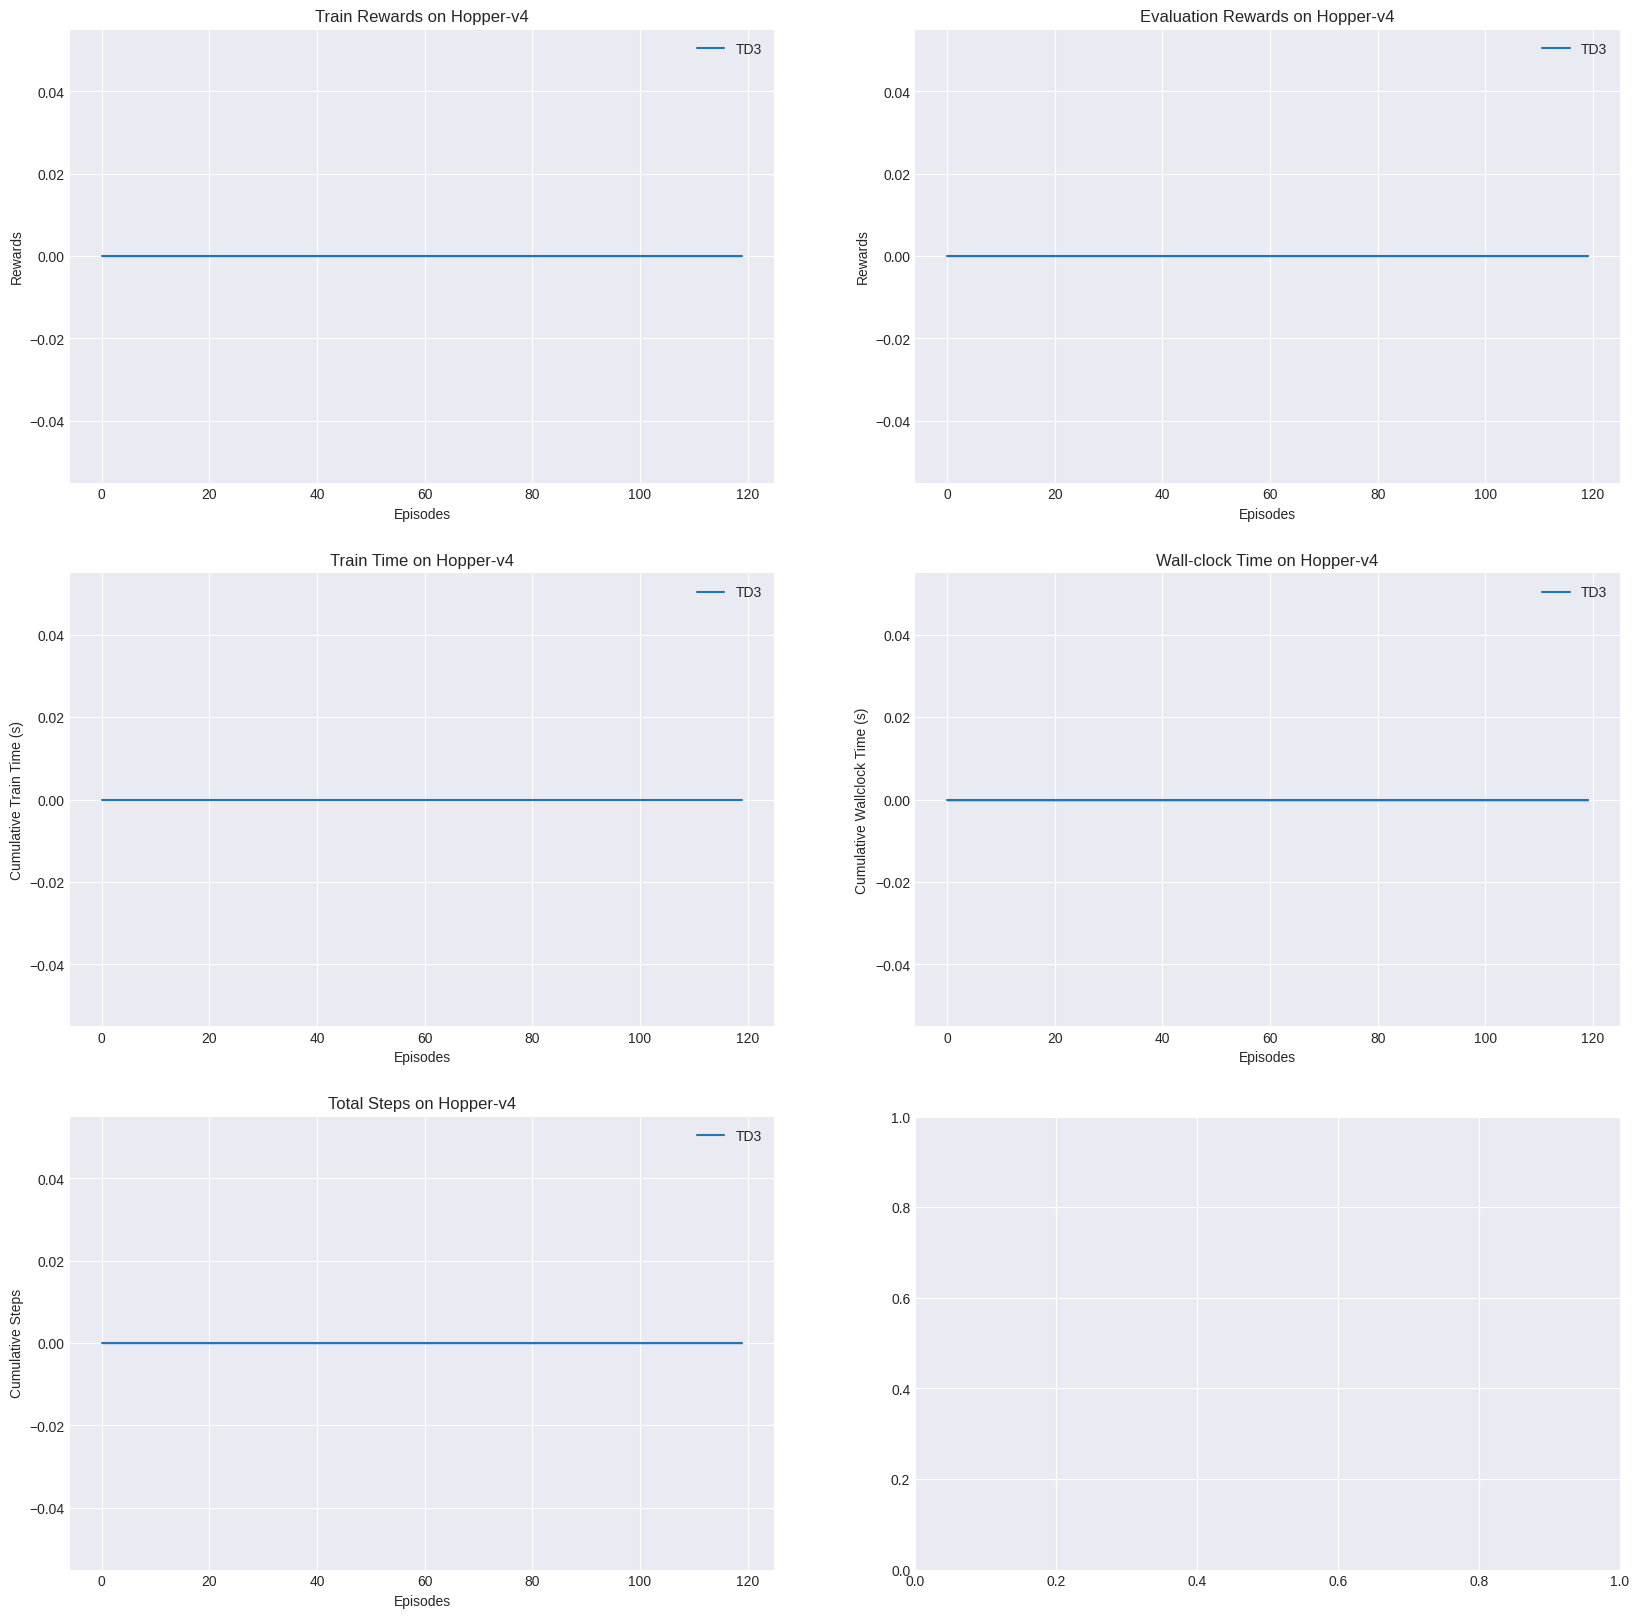

In [ ]:
plotResults(trainRewards, evalRewards, trainTime, wallClockTime, episodeSteps, ["TD3"], ENV_NAME)

#Pendulam-V1

In [ ]:
# N_RUNS = 1
# MAX_EPISODE_STEPS = 200
# ENV_NAME = 'Pendulum-v1'

# IMAGES_DIR = os.path.join(CWD, 'images', ENV_NAME, 'v_notebook')
# os.makedirs(IMAGES_DIR, exist_ok=True)

# HYPERPARAM_FILE = os.path.join(CWD, 'hyperparameters_ddpg_td3.csv')
# if not(os.path.exists(HYPERPARAM_FILE)):
#     hy_file = open(HYPERPARAM_FILE, 'w')
#     hy_file.write("AGENT,N_RUNS,MAX_EPISODE_STEPS,env,SEED,N_EPISODES,GAMMA,NOISE_SCALE_RATIO,MIN_SAMPLES,EPOCHS,TAU,BATCH_SIZE,UPDATE_FREQUENCY,BUFFER_SIZE,VALUE_HDIM,POLICY_HDIM,POLICY_OPTIM,VALUE_OPTIM,POLICY_LR,VALUE_LR,MAX_TRAIN_EPISODES,MAX_EVAL_EPISODES,DEVICE\n")

# env = gym.make(
#     ENV_NAME,
#     render_mode="rgb_array",
#     max_episode_steps=MAX_EPISODE_STEPS
# )

# trainRewards = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
# trainTime = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
# evalRewards = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
# wallClockTime = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))
# episodeSteps = np.zeros((3, N_RUNS, MAX_TRAIN_EPISODES))

# SEED = 42
# random.seed(SEED)
# SEEDS = [random.randint(0, 1000) for _ in range(N_RUNS)]
# print(f'SEEDS = {SEEDS}')

In [ ]:
# N_EPISODES = 1

# GAMMA = 0.95
# NOISE_SCALE_RATIO = 0.15
# MIN_SAMPLES = 500
# EPOCHS = 10
# TAU = 0.0015
# BATCH_SIZE = 256
# UPDATE_FREQUENCY = 10
# POLICY_UPDATE_FREQUENCY = 50
# VALUE_UPDATE_FREQUENCY = 50
# POLICY_TRAIN_FREQUENCY = 2
# BUFFER_SIZE = 100000

# VALUE_HDIM = [64, 64]
# POLICY_HDIM = [64, 64]
# POLICY_OPTIM = optim.RMSprop
# VALUE_OPTIM = optim.RMSprop
# POLICY_LR = 1e-3
# VALUE_LR = 1e-3

# MAX_TRAIN_EPISODES = 120
# MAX_EVAL_EPISODES = 1
# DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# hy_file = open(HYPERPARAM_FILE, 'a')
# hy_file.write(f"TD3,{N_RUNS},{MAX_EPISODE_STEPS},{ENV_NAME},{SEED},{N_EPISODES},{GAMMA},{NOISE_SCALE_RATIO},{MIN_SAMPLES},{EPOCHS},{TAU},{BATCH_SIZE},{UPDATE_FREQUENCY},{BUFFER_SIZE},{VALUE_HDIM},{POLICY_HDIM},{POLICY_OPTIM},{VALUE_OPTIM},{POLICY_LR},{VALUE_LR},{MAX_TRAIN_EPISODES},{MAX_EVAL_EPISODES},{DEVICE}\n")
# hy_file.close()

# for run in range(N_RUNS):
#     print("Run {}".format(run))
#     seed = SEEDS[run]
#     ddpg = TD3(env, seed, GAMMA, TAU, BUFFER_SIZE, BATCH_SIZE, POLICY_UPDATE_FREQUENCY, VALUE_UPDATE_FREQUENCY, POLICY_TRAIN_FREQUENCY, EPOCHS, VALUE_HDIM, POLICY_HDIM, POLICY_OPTIM, VALUE_OPTIM, POLICY_LR, VALUE_LR, MAX_TRAIN_EPISODES, MAX_EVAL_EPISODES, None)
#     trainRewards[1, run, :], trainTime[1, run, :], evalRewards[1, run, :], wallClockTime[1, run, :], _, episodeSteps[1, run, :] = ddpg.runTD3()


Run 0


TD3 Training:   2%|▎               | 2/120 [00:00<00:43,  2.70it/s, episodeSteps=200, evalReward=-186, trainReward=-184]<ipython-input-72-659c43ecaf52>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  action_noise = torch.tensor(actionHighVal - actionLowVal, dtype=torch.float32, device=DEVICE) * torch.normal(0, 1, size=actions.shape, device=DEVICE)
TD3 Training:  38%|█████▊         | 46/120 [11:16<18:07, 14.70s/it, episodeSteps=200, evalReward=-187, trainReward=-187]


KeyboardInterrupt: 

In [ ]:
# plotResults(trainRewards, evalRewards, trainTime, wallClockTime, episodeSteps, ["TD3"], ENV_NAME)

# PPO
<a id="PPO"></a>

PPO have quite a few key implementation details.
Please Refer:
"Proximal Policy Optimization Algorithms" [PPO](https://arxiv.org/abs/1707.06347) and
"Implementation Matters in Deep RL: A Case Study on PPO and TRPO" [Implementation Matters](https://openreview.net/forum?id=r1etN1rtPB)

Lets finish things off with an easy implementation of PPO!
A easy way to check you implementation details is running your implementation on some easier environment first and make sure it converges. Like "CartPole-v1" should converge to episodic return of 500 in around 300k steps.

In [ ]:
#All imports here
## Feel free to add or remove
import os
import random
import time
from tqdm import tqdm
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt

In [ ]:
#PPO works with vectorized enviromnets lets make a function that returns a function that returns an environment.
#Refer how to make vectorized environments in gymnasium
def make_env(name, seed):
    #Your code here
    def fun():
        env = gym.make(name)
        env = gym.wrappers.RecordEpisodeStatistics(env)
        env = gym.wrappers.ClipAction(env)
        env = gym.wrappers.NormalizeObservation(env)
        env = gym.wrappers.TransformObservation(env, lambda obs: np.clip(obs, -10, 10))
        env = gym.wrappers.NormalizeReward(env)
        env = gym.wrappers.TransformReward(env, lambda reward: np.clip(reward, -10, 10))
        _ = env.reset(seed=seed)
        env.action_space.seed(seed)
        env.observation_space.seed(seed)
        return env
    return fun


In [ ]:
#We initialize the layers in PPO , refer paper.
#Lets initialize the layers with this function
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    if hasattr(layer, 'bias'):
        torch.nn.init.orthogonal_(layer.weight, std)
        torch.nn.init.constant_(layer.bias, bias_const)
    return layer

In [ ]:
class Net(nn.Module):
        def __init__(self, inDim, outDim, hDim, act='tanh'):
            super().__init__()
            act_fn = nn.Tanh() if act=='tanh' else nn.ReLU()
            net_list = [nn.Linear(inDim, hDim[0]), act_fn]
            for i in range(len(hDim)-1):
                net_list += [nn.Linear(hDim[i], hDim[i+1]), act_fn]
            net_list += [nn.Linear(hDim[-1], outDim)]
            self.net = nn.Sequential(*net_list)
            self.weight_init()

        def weight_init(self):
            for i in range(len(self.net)):
                layer_init(self.net[i])

        def forward(self, x):
            return self.net(x)

In [ ]:
#Lets make the Main agent class
class Agent(nn.Module):
    def __init__(self, envs):
        super(Agent, self).__init__()
        #self.envs = envs
        self.critic = Net(inDim=np.array(envs.single_observation_space.shape).prod(),
                              outDim=1, hDim=[64,64], act='tahn')

        #(Returns a single value of the observation)

        self.actor = Net(inDim=np.array(envs.single_observation_space.shape).prod(),
                              outDim=np.prod(envs.single_action_space.shape), hDim=[64,64], act='tahn')
        self.actor_logstd = nn.Parameter(torch.zeros(1, np.prod(envs.single_action_space.shape)))
        #(Returns the logits of the actions on the observations)

    def get_value(self, x):
        # Returns the value from the critic on the observation x
        return self.critic(x)

    def get_action_and_value(self, x, action=None):
        #Returns 1.the action (sampled according to the logits),
        #2.log_prob of the action,
        #3.Entropy,
        #4.Value from the critic

        #Your code here
        action_mean = self.actor(x)
        action_logstd = self.actor_logstd.expand_as(action_mean)
        action_std = torch.exp(action_logstd)
        probs = Normal(action_mean, action_std)
        if action is None:
            action = probs.sample()
        return action, probs.log_prob(action).sum(1), probs.entropy().sum(1), self.critic(x)


In [ ]:
class PPO_Trainer():
    def __init__(self, config):
        self.config = config
        random.seed(config["seed"])
        np.random.seed(config["seed"])
        torch.manual_seed(config["seed"])
        torch.backends.cudnn.deterministic = True
        self.device = torch.device("cuda" if torch.cuda.is_available() and cuda else "cpu")

        self.batch_size = int(config["num_envs"] * config["num_steps"])
        self.minibatch_size = int(self.batch_size // config['num_minibatches'])
        #Make the vectorized environments, use the helper function that we have declared above
        # Your code here
        self.envs = gym.vector.AsyncVectorEnv([make_env(name=config["gym_id"],
                                                        seed=config["seed"]+i) for i in range(config["num_envs"])])

        self.agent = Agent(envs=self.envs).to(self.device)
        self.optimizer = optim.Adam(self.agent.parameters(), lr=config["learning_rate"], eps=1e-5)


        self.test_rewards = []
        self.train_rewards = []
        self.train_steps = []
        self.cpu_time = []
        self.wall_clock_time = []

    def evaluate_agent(self, cfg):
        test_envs = gym.vector.AsyncVectorEnv([make_env(name=cfg["gym_id"], seed=config["seed"]+i)for i in range(cfg["num_envs"])])
        st, info = test_envs.reset(seed=42)
        out = []
        for i in range(cfg["num_steps"]):
            with torch.no_grad():
                action = self.agent.actor(torch.tensor(st, dtype=torch.float32).to(self.device)).cpu().numpy()
            st, r, _,_, info = test_envs.step(action)
            if "final_info" in info.keys():
                rewards = np.hstack([info['final_info'][j]['episode']['r'] for j in range(cfg["num_envs"])])
                out += [rewards]
        return out

    def train(self):
        train_tcpu_start = time.time()
        train_clock_start = time.perf_counter()

        global_step = 0
        start_time = time.time()
        next_obs, info = self.envs.reset()
        next_obs = torch.Tensor(next_obs).to(self.device)
        next_done = torch.zeros(self.config["num_envs"]).to(self.device)
        num_updates = self.config["total_timesteps"] // self.batch_size

        num_steps = self.config["num_steps"]
        num_envs = self.config["num_envs"]

        obs = torch.zeros((num_steps, num_envs) + self.envs.single_observation_space.shape).to(self.device)
        actions = torch.zeros((num_steps, num_envs) + self.envs.single_action_space.shape).to(self.device)
        logprobs = torch.zeros((num_steps, num_envs)).to(self.device)
        rewards = torch.zeros((num_steps, num_envs)).to(self.device)
        dones = torch.zeros((num_steps, num_envs)).to(self.device)
        values = torch.zeros((num_steps, num_envs)).to(self.device)

        #This is the main training loop where we collect the experience ,
        #calculate the advantages, ratio , the total loss and learn the policy
        for update in tqdm(range(1, num_updates + 1)):

            # Annealing the rate if instructed to do so.
            if self.config["anneal_lr"]:
                # Your code here
                frac = 1.0 - (update - 1.0) / num_updates
                lrnow = frac * self.config["learning_rate"]
                self.optimizer.param_groups[0]["lr"] = lrnow


            for step in range(0, num_steps):
                global_step += 1 * num_envs  # We are taking a step in each environment
                obs[step] = next_obs
                dones[step] = next_done

                # ALGO LOGIC: action logic
                with torch.no_grad():
                    #Get the action , logprob , _ , value from the agent.
                    action, logprob, _, value = self.agent.get_action_and_value(next_obs)
                    values[step] = value.flatten()
                actions[step] = action
                logprobs[step] = logprob

                # TRY NOT TO MODIFY: execute the game and log data.
                next_obs, reward, done,truncated, info = self.envs.step(action.cpu().numpy())
                rewards[step] = torch.tensor(reward).to(self.device).view(-1)
                next_obs, next_done = torch.Tensor(next_obs).to(self.device), torch.Tensor(done).to(self.device)


                if "final_info" in info.keys():
                    r = np.hstack([info['final_info'][j]['episode']['r'] for j in range(num_envs)])
                    l = np.hstack([info['final_info'][j]['episode']['l'] for j in range(num_envs)])
                    t = np.hstack([info['final_info'][j]['episode']['t'] for j in range(num_envs)])
                    self.train_steps.append([l])
                    self.cpu_time.append([t])
                    self.train_rewards.append([r])


            # bootstrap value if not done
            with torch.no_grad():
                next_value = self.agent.get_value(next_obs).reshape(1, -1)
                if self.config['gae']:
                    advantages = torch.zeros_like(rewards).to(self.device)
                    lastgaelam = 0
                    for t in reversed(range(num_steps)):
                        if t == num_steps - 1:
                            nextnonterminal = 1.0 - next_done
                            nextvalues = next_value
                        else:
                            nextnonterminal = 1.0 - dones[t + 1]
                            nextvalues = values[t + 1]
                        delta = rewards[t] + self.config["gamma"] * nextvalues * nextnonterminal - values[t]
                        advantages[t] = lastgaelam = delta + self.config["gamma"] * self.config["gae_lambda"] * nextnonterminal * lastgaelam
                    returns = advantages + values
                else:
                    returns = torch.zeros_like(rewards).to(self.device)
                    for t in reversed(range(num_steps)):
                        if t == num_steps - 1:
                            nextnonterminal = 1.0 - next_done
                            next_return = next_value
                        else:
                            nextnonterminal = 1.0 - dones[t + 1]
                            next_return = returns[t + 1]
                        returns[t] = rewards[t] + self.config["gamma"] * nextnonterminal * next_return
                    advantages = returns - values


            # flatten the batch
            b_obs = obs.reshape((-1,) + self.envs.single_observation_space.shape)
            b_logprobs = logprobs.reshape(-1)
            b_actions = actions.reshape((-1,) + self.envs.single_action_space.shape)
            b_advantages = advantages.reshape(-1)
            b_returns = returns.reshape(-1)
            b_values = values.reshape(-1)

            # Optimizing the policy and value network
            b_inds = np.arange(self.batch_size)
            clipfracs = []
            for epoch in range(self.config["update_epochs"]):
                #Get a random sample of batch_size
                np.random.shuffle(b_inds)
                for start in range(0, self.batch_size, self.minibatch_size):
                    end = start + self.minibatch_size
                    mb_inds = b_inds[start:end]

                    #Your code here
                    #Calculate the ratio
                    _, newlogprob, entropy, newvalue = self.agent.get_action_and_value(b_obs[mb_inds], b_actions[mb_inds])
                    logratio =  newlogprob - b_logprobs[mb_inds]
                    ratio = torch.exp(logratio)

                    with torch.no_grad():
                        # calculate approx_kl http://joschu.net/blog/kl-approx.html
                        # Refer the blog for calculating kl in a simpler way
                        old_approx_kl = (-logratio).mean()
                        approx_kl = ((ratio - 1) - logratio).mean()
                        clipfracs += [((ratio - 1.0).abs() > self.config["clip_coef"]).float().mean().item()]

                    mb_advantages = b_advantages[mb_inds]
                    if self.config["norm_adv"]:
                        mb_advantages = (mb_advantages - mb_advantages.mean()) / (mb_advantages.std() + 1e-8)

                    # Policy loss (Calculate the policy loss pg_loss)
                    # Your code here
                    pg_loss1 = -mb_advantages * ratio
                    pg_loss2 = -mb_advantages * torch.clamp(ratio, 1 - self.config["clip_coef"], 1 + self.config["clip_coef"])
                    pg_loss = torch.max(pg_loss1, pg_loss2).mean()
                    # Value loss v_loss
                    newvalue = newvalue.view(-1)
                    if self.config["clip_vloss"]:
                        v_loss_unclipped = (newvalue - b_returns[mb_inds]) ** 2
                        v_clipped = b_values[mb_inds] + torch.clamp(
                            newvalue - b_values[mb_inds],
                            -self.config["clip_coef"],
                            self.config["clip_coef"],
                        )
                        v_loss_clipped = (v_clipped - b_returns[mb_inds]) ** 2
                        v_loss_max = torch.max(v_loss_unclipped, v_loss_clipped)
                        v_loss = 0.5 * v_loss_max.mean()
                    else:
                        v_loss = 0.5 * ((newvalue - b_returns[mb_inds]) ** 2).mean()


                    # Entropy loss
                    entropy_loss = entropy.mean()

                    # Total loss
                    loss = pg_loss - self.config["ent_coef"] * entropy_loss + v_loss * self.config["vf_coef"]

                    self.optimizer.zero_grad()
                    loss.backward()
                    nn.utils.clip_grad_norm_(self.agent.parameters(), self.config["max_grad_norm"])
                    self.optimizer.step()

                if self.config["target_kl"] is not None:
                    if approx_kl > self.config["target_kl"]:
                        break

            y_pred, y_true = b_values.cpu().numpy(), b_returns.cpu().numpy()
            var_y = np.var(y_true)
            explained_var = np.nan if var_y == 0 else 1 - np.var(y_true - y_pred) / var_y

            # test agent
            self.test_rewards += self.evaluate_agent(self.config)


        self.envs.close()


#HalfCheetah-v4

In [ ]:
config = {
    "gym_id": "HalfCheetah-v4",
    "learning_rate": 0.0004,
    "seed": 32,
    "total_timesteps": 200000,
    "torch_deterministic": True,
    "cuda": True,
    "num_envs": 4,
    "num_steps": 100,
    "anneal_lr": True,
    "gae": True,
    "gamma": 0.95,
    "gae_lambda": 0.95,
    "num_minibatches": 32,
    "update_epochs": 10,
    "norm_adv": True,
    "clip_coef": 0.2,
    "clip_vloss": True,
    "ent_coef": 0.0,
    "vf_coef": 0.5,
    "max_grad_norm": 1,
    "target_kl": None
}

In [ ]:
ppo = PPO_Trainer(config)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
ppo.train()

100%|██████████| 500/500 [23:22<00:00,  2.81s/it]


In [ ]:
def plot(data, name):
    fig, ax = plt.subplots()
    x = np.array(data).squeeze()
    #x = x / (np.arange(x.shape[0])+1).reshape(-1,1)
    max_vals = x.max(axis=1)
    min_vals = x.min(axis=1)
    mean_vals = x.mean(axis=1)
    totalEpisodeCount = x.shape[0]
    ax.fill_between(np.arange(totalEpisodeCount), min_vals, max_vals, alpha=0.5)
    ax.plot(np.arange(totalEpisodeCount), mean_vals, label=name)
    ax.legend()
    plt.show()

In [ ]:
def plot1(data, name):
    fig, ax = plt.subplots()
    x = np.array(data)
    totalEpisodeCount = x.shape[0]
    ax.plot(np.arange(totalEpisodeCount), x, label=name)
    ax.legend()
    plt.show()

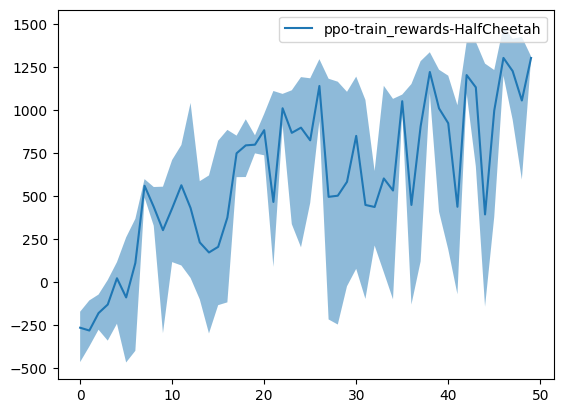

In [ ]:
plot(ppo.train_rewards, "ppo-train_rewards-HalfCheetah")

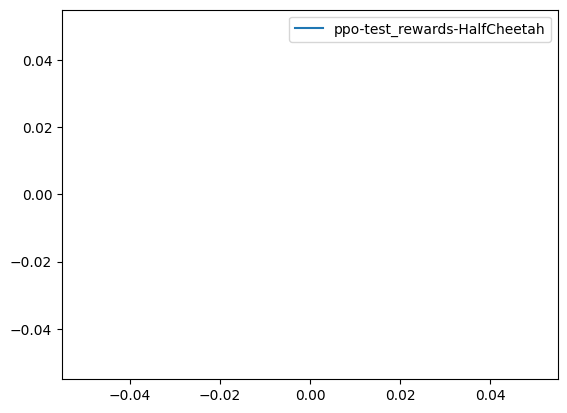

In [ ]:
plot1(ppo.test_rewards, "ppo-test_rewards-HalfCheetah")

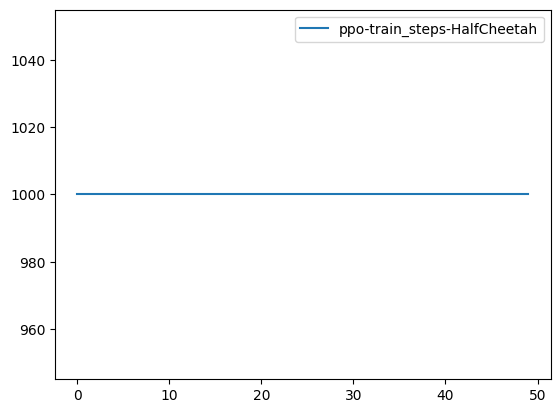

In [ ]:
plot(ppo.train_steps, "ppo-train_steps-HalfCheetah")

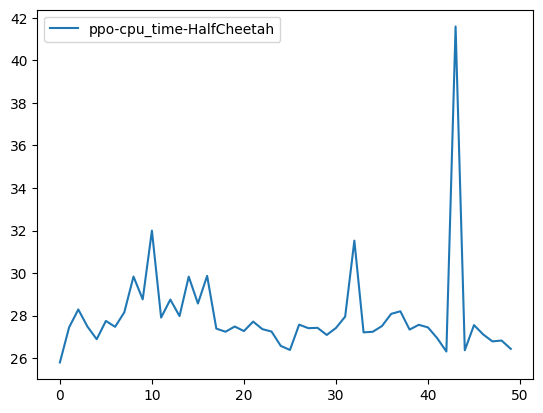

In [ ]:
plot(ppo.cpu_time, "ppo-cpu_time-HalfCheetah")

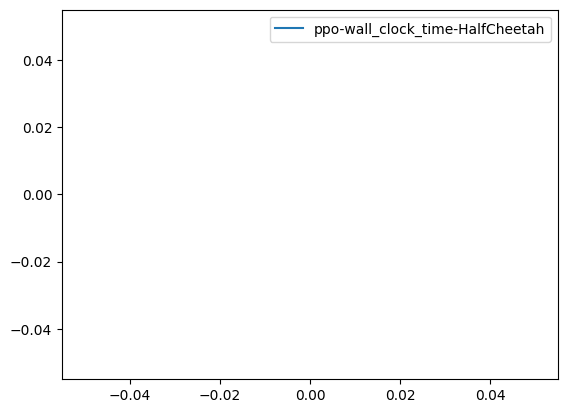

In [ ]:
plot1(ppo.wall_clock_time, "ppo-wall_clock_time-HalfCheetah")

In [ ]:
plot(ppo.wall_clock_time, "ppo-wall_clock_time-HalfCheetah")

#Pendulum-v1

In [ ]:
config = {
    "gym_id": "Pendulum-v1",
    "learning_rate": 0.0004,
    "seed": 32,
    "total_timesteps": 20000,
    "torch_deterministic": True,
    "cuda": True,
    "num_envs": 4,
    "num_steps": 100,
    "anneal_lr": True,
    "gae": True,
    "gamma": 0.95,
    "gae_lambda": 0.95,
    "num_minibatches": 32,
    "update_epochs": 10,
    "norm_adv": True,
    "clip_coef": 0.2,
    "clip_vloss": True,
    "ent_coef": 0.0,
    "vf_coef": 0.5,
    "max_grad_norm": 1,
    "target_kl": None
}

In [ ]:
ppo = PPO_Trainer(config)

In [ ]:
ppo.train()

100%|██████████| 50/50 [02:30<00:00,  3.01s/it]


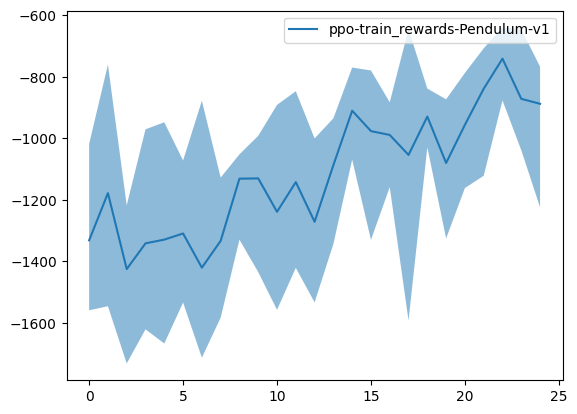

In [ ]:
plot(ppo.train_rewards, "ppo-train_rewards-Pendulum-v1")

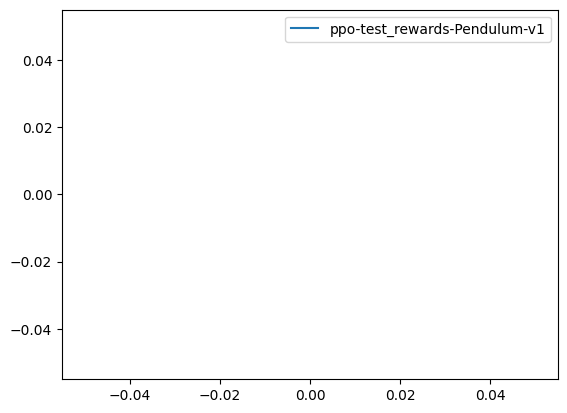

In [ ]:
plot1(ppo.test_rewards, "ppo-test_rewards-Pendulum-v1")

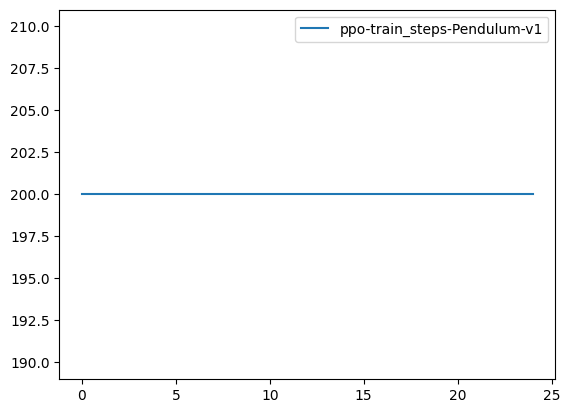

In [ ]:
plot(ppo.train_steps, "ppo-train_steps-Pendulum-v1")

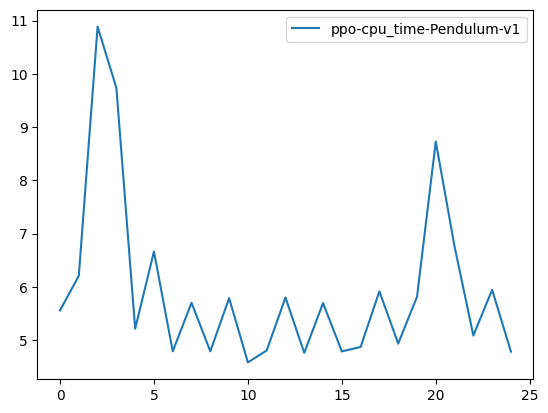

In [ ]:
plot(ppo.cpu_time, "ppo-cpu_time-Pendulum-v1")

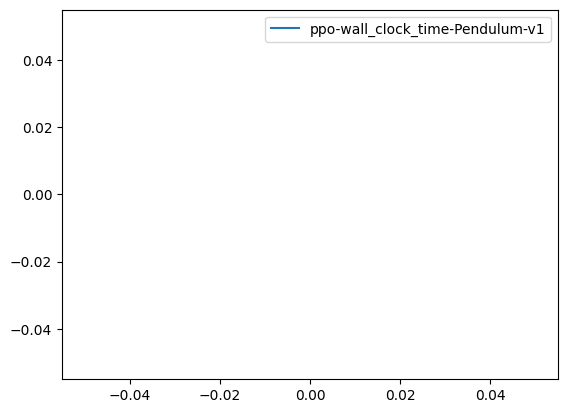

In [ ]:
plot1(ppo.wall_clock_time, "ppo-wall_clock_time-Pendulum-v1")

#Hopper-V4

In [ ]:
# config = {
#     "gym_id": "Hopper-v4",
#     "learning_rate": 0.0004,
#     "seed": 1,
#     "total_timesteps": 20000,
#     "torch_deterministic": True,
#     "cuda": True,
#     "num_envs": 1,
#     "num_steps": 100,
#     "anneal_lr": True,
#     "gae": True,
#     "gamma": 0.95,
#     "gae_lambda": 0.95,
#     "num_minibatches": 32,
#     "update_epochs": 10,
#     "norm_adv": True,
#     "clip_coef": 0.2,
#     "clip_vloss": True,
#     "ent_coef": 0.0,
#     "vf_coef": 0.5,
#     "max_grad_norm": 1,
#     "target_kl": None
# }

In [ ]:
# ppo = PPO_Trainer(config)

In [ ]:
# ppo.train()

In [ ]:
# plot(ppo.train_rewards, "ppo-train_rewards-Hopper-v1")

In [ ]:
# plot1(ppo.test_rewards, "ppo-test_rewards-Hopper-v1")

In [ ]:
# plot(ppo.train_steps, "ppo-train_steps-Hopper-v1")

In [ ]:
# plot(ppo.cpu_time, "ppo-cpu_time-Hopper-v1")

In [ ]:
# plot1(ppo.wall_clock_time, "ppo-wall_clock_time-HalfCheetah")

# Experiments and Plots
<a id="experiments"></a>

Run the DDPG, TD3, PPO on Pendulum, Hopper and Half Cheetah environment respectively.

Plot the following for each of the environment separately. Note based on different hyper-parameters and strategies you use, you can have multiple plots for each of the below.

As you are aware from your past experience, single run of the agent over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy. You need to run 5 different instances of the environment for each agent. As you have seen in the lecture slides, we plot the maximum and minimum values around the mean in the plots, so this gives us the shaded plot with the mean curve in the between. In this assignment, you are required to do the same. Generate plots with envelop between maximum and minimum value
For each of the quantity of interest, plot each of the agent within the same plot using different colors for the envelop. Choose colors such that that there is clear contrast between the plots corresponding to different agents.

1. Plot mean train rewards vs episodes
2. Plot mean evaluation rewards vs episodes
3. Plot total steps vs episode
4. Plot train time vs episode
5. Plot wall clock time vs episode
6. Based on plots what are your observations about DDPG and TD3, compare the two algorithms.
7. What is the advatage of PPO over DDPG or TD3?

#1,2,3,4,5.
 I have plotted all the curves with the codes. and attached the images for that.

#6.
For DDPG we are getting negative rewards and our TD3 agent is not Learning.This could be solved by extensive training.
#7.
The advantages of Proximal Policy Optimization (PPO) over Deep Deterministic Policy Gradient (DDPG) or Twin Delayed DDPG (TD3):

1. **Stability**: PPO is generally more stable during training compared to DDPG or TD3.

2. **Sample Efficiency**: PPO tends to require fewer samples to learn a good policy compared to DDPG or TD3. This is because PPO updates the policy using multiple epochs on the same batch of data, which makes better use of collected experience.

3. **No Need for Replay Buffer**: Unlike DDPG and TD3, which rely on a replay buffer to store experiences, PPO learns directly from the most recent collected data. This can simplify the implementation and reduce memory requirements.


5. **Effective for Continuous and Discrete Action Spaces**: While DDPG and TD3 are mainly designed for continuous action spaces, PPO is versatile and can handle both continuous and discrete action spaces effectively with minor modifications.

6. **Robustness to Hyperparameters**: PPO is less sensitive to hyperparameters compared to DDPG or TD3. It typically performs reasonably well with a wide range of hyperparameter settings, making it more user-friendly for practitioners.


